In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/hotel-booking-cancellation-prediction/booking.csv


**Visualize Data - **


In [22]:
data = pd.read_csv('/kaggle/input/hotel-booking-cancellation-prediction/booking.csv')
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


**Data Preprocessing - **

Visualizing categorical data columns :

In [23]:
cat_col = data.select_dtypes(np.object_)
print(cat_col)

      Booking_ID  type of meal    room type market segment type  \
0       INN00001   Meal Plan 1  Room_Type 1             Offline   
1       INN00002  Not Selected  Room_Type 1              Online   
2       INN00003   Meal Plan 1  Room_Type 1              Online   
3       INN00004   Meal Plan 1  Room_Type 1              Online   
4       INN00005  Not Selected  Room_Type 1              Online   
...          ...           ...          ...                 ...   
36280   INN36282   Meal Plan 2  Room_Type 1              Online   
36281   INN36283   Meal Plan 1  Room_Type 1              Online   
36282   INN36284   Meal Plan 1  Room_Type 4              Online   
36283   INN36285   Meal Plan 1  Room_Type 1             Offline   
36284   INN36286   Meal Plan 1  Room_Type 4              Online   

      date of reservation booking status  
0               10/2/2015   Not_Canceled  
1               11/6/2018   Not_Canceled  
2               2/28/2018       Canceled  
3               5/20/20

Droping non-interested categorical columns :

In [24]:
data = data.drop(columns=['Booking_ID'])
data = data.drop(columns=['date of reservation'])
print(data.columns)
display(data.isnull().sum())

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'type of meal', 'car parking space',
       'room type', 'lead time', 'market segment type', 'repeated', 'P-C',
       'P-not-C', 'average price', 'special requests', 'booking status'],
      dtype='object')


number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
booking status              0
dtype: int64

Converting categorical data to int/float :

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['booking status'] = le.fit_transform(data['booking status'])
data['type of meal'] = le.fit_transform(data['type of meal'])
data['room type'] = le.fit_transform(data['room type'])
data['market segment type'] = le.fit_transform(data['market segment type'])
display(data)

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status
0,1,1,2,5,0,0,0,224,3,0,0,0,88.00,0,1
1,1,0,1,3,3,0,0,5,4,0,0,0,106.68,1,1
2,2,1,1,3,0,0,0,1,4,0,0,0,50.00,0,0
3,1,0,0,2,0,0,0,211,4,0,0,0,100.00,1,0
4,1,0,1,2,3,0,0,48,4,0,0,0,77.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,2,0,0,2,1,0,0,346,4,0,0,0,115.00,1,0
36281,2,0,1,3,0,0,0,34,4,0,0,0,107.55,1,1
36282,2,0,1,3,0,0,3,83,4,0,0,0,105.61,1,1
36283,3,0,0,4,0,0,0,121,3,0,0,0,96.90,1,1


In [26]:
print(data.dtypes)

number of adults              int64
number of children            int64
number of weekend nights      int64
number of week nights         int64
type of meal                  int64
car parking space             int64
room type                     int64
lead time                     int64
market segment type           int64
repeated                      int64
P-C                           int64
P-not-C                       int64
average price               float64
special requests              int64
booking status                int64
dtype: object


**Building Models(SVM and RandomForestClassifier) - ** 

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

Selecting best 5 features for training - 

In [29]:
X = data.drop(columns=['booking status'])  # Features
y = data['booking status']  # Target variable

# Initialize SelectKBest
best_features = SelectKBest(f_classif, k=5).fit(X, y)
selected_feature_indices = best_features.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]

print(selected_feature_names)

Index(['lead time', 'market segment type', 'repeated', 'average price',
       'special requests'],
      dtype='object')


Building SVM model

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame
# Use the selected features for X
X_selected = X[selected_feature_names]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_model = SVC(kernel='linear')

# Fit the SVM model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(classification_report(y_test, y_pred))

0.7966101694915254
              precision    recall  f1-score   support

           0       0.73      0.61      0.66      2402
           1       0.82      0.89      0.85      4855

    accuracy                           0.80      7257
   macro avg       0.78      0.75      0.76      7257
weighted avg       0.79      0.80      0.79      7257



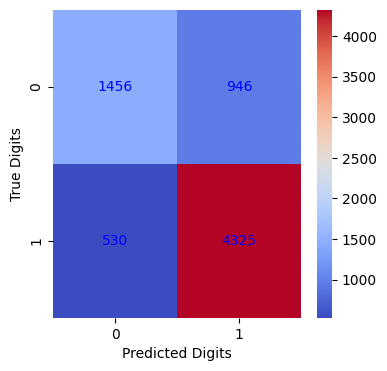

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='coolwarm', annot=True, fmt='.0f', annot_kws={"color": "blue"})
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()

Building RandomForestClassifier model 

In [14]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      2402
           1       0.89      0.91      0.90      4855

    accuracy                           0.86      7257
   macro avg       0.85      0.84      0.85      7257
weighted avg       0.86      0.86      0.86      7257

Accuracy: 0.8645445776491664


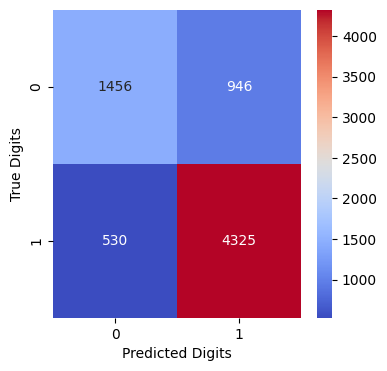

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='coolwarm', annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()